## 仿射轉換 灰階影像平移

(316, 316)
(316, 316)


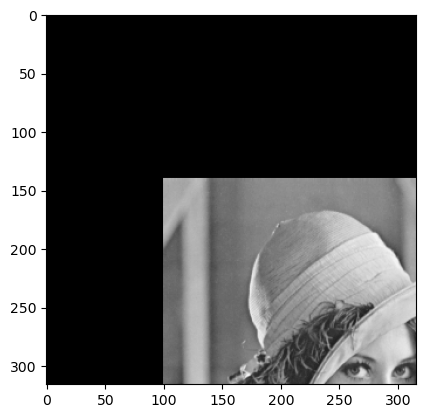

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 加載圖片
image_path = 'lenna.jpg'
image = cv2.imread(image_path, 0)  # 讀取灰階圖像
print(image.shape)

# 獲取圖像的尺寸
height, width = image.shape

# 創建一個與原圖大小相同的空陣列，用來存放平移後的圖像
translated_image = np.zeros_like(image)
print(translated_image.shape)  # 輸出平移後圖像的尺寸

# 對圖像的每個像素應用平移操作
for y in range(height):  # 遍歷圖像的每一行
    for x in range(width):  # 遍歷圖像的每一列
            
            new_x = x+100
            new_y = y+140
            # 確保新坐標在圖像邊界內
            if 0 <= new_x < width and 0 <= new_y < height:
                translated_image[new_y, new_x] = image[y, x]

#顯示平移後的圖像
plt.imshow(translated_image, cmap='gray')


## 仿射轉換 彩色影像平移

(248, 240, 3)
(248, 240, 3)


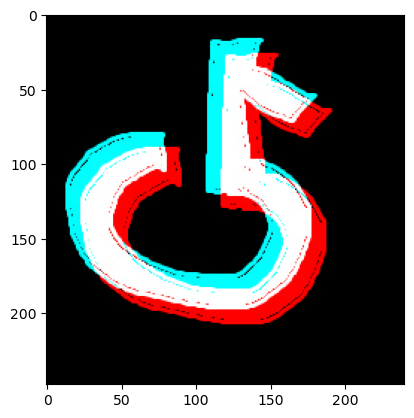

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 加載圖片
image_path = 'tiktok.jpg'
image = cv2.imread(image_path, 1)  # 讀取彩色圖像
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 將 BGR 轉換為 RGB 格式，適合 matplotlib 顯示
print(image.shape)

# 獲取圖像的尺寸
height, width, channl = image.shape

# 創建一個與原圖大小相同的空陣列，用來存放平移後的圖像
translated_image = np.zeros_like(image)
print(translated_image.shape)  # 輸出平移後圖像的尺寸

# 對圖像的每個像素應用平移操作
for c in range(channl):  # 遍歷每個通道（R、G、B）
    for y in range(height):  # 遍歷圖像的每一行
        for x in range(width):  # 遍歷圖像的每一列

            if c == 0:  # 處理R通道 留原地
                new_x = x
                new_y = y
                # 確保新坐標在圖像邊界內
                if 0 <= new_x < width and 0 <= new_y < height:
                    translated_image[new_y, new_x, c] = image[y, x, c]

            if c == 1:  # 處理G通道 左上移
                new_x = x-10
                new_y = y-10
                if 0 <= new_x < width and 0 <= new_y < height:
                    translated_image[new_y, new_x, c] = image[y, x, c]

            if c == 2:  # 處理B通道 左上移
                new_x = x-10
                new_y = y-10
                if 0 <= new_x < width and 0 <= new_y < height:
                    translated_image[new_y, new_x, c] = image[y, x, c]

#顯示平移後的圖像
plt.imshow(translated_image)


## 仿射轉換 影像旋轉(不內插)

(100, 100)


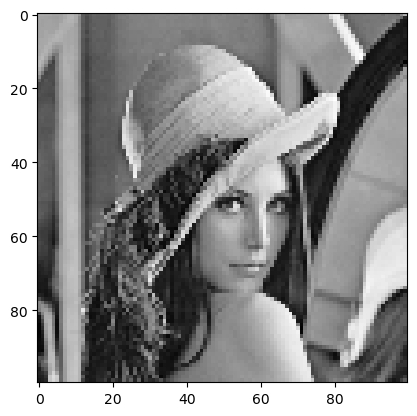

(100, 100)


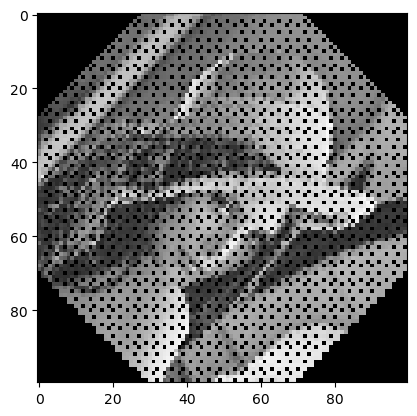

In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 加載圖片
image_path = 'lenna.jpg'
image = cv2.imread(image_path, 0)  # 讀取灰階圖像
image = cv2.resize(image, (100, 100))  # 縮小圖像
print(image.shape)
plt.imshow(image, cmap='gray')
plt.show()

# 獲取圖像的尺寸
height, width = image.shape

# 創建一個與原圖大小相同的空陣列，用來存放平移後的圖像
rotated_image = np.zeros_like(image)
print(rotated_image.shape)  # 輸出平移後圖像的尺寸


# 計算旋轉矩陣的 cos 和 sin
cos_theta = np.cos(np.radians(45)) # 旋轉45度
sin_theta = np.sin(np.radians(45)) # 旋轉45度

# 計算旋轉中心
center_x = width // 2
center_y = height // 2

# 對圖像的每個像素應用旋轉操作
for y in range(height):  # 遍歷圖像的每一行
    for x in range(width):  # 遍歷圖像的每一列
        
        # 計算以中心點為基準的相對坐標
        relative_x = x - center_x
        relative_y = y - center_y

        # 旋轉變換公式
        new_x = int(cos_theta * relative_x - sin_theta * relative_y + center_x)
        new_y = int(sin_theta * relative_x + cos_theta * relative_y + center_y)

        # 確保新坐標在圖像邊界內
        if 0 <= new_x < width and 0 <= new_y < height:
            rotated_image[new_y, new_x] = image[y, x]
#顯示平移後的圖像
plt.imshow(rotated_image, cmap='gray')


## 仿射轉換 影像旋轉 最近鄰插值

(100, 100)
(100, 100)


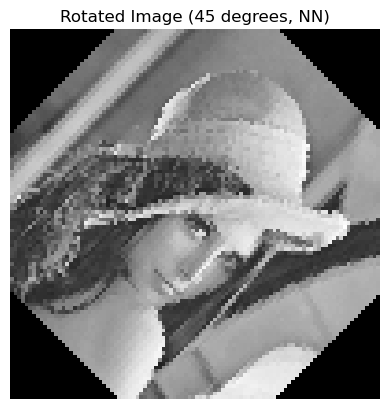

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 加載圖片
image_path = 'lenna.jpg'
image = cv2.imread(image_path, 0)  # 讀取灰階圖像
image = cv2.resize(image, (100, 100))  # 縮小圖像
print(image.shape)

# 獲取圖像的尺寸
height, width = image.shape

# 創建一個與原圖大小相同的空陣列，用來存放旋轉後的圖像
NN_rotated_image = np.zeros_like(image)
print(NN_rotated_image.shape)  # 輸出旋轉後圖像的尺寸

# 計算旋轉矩陣的 cos 和 sin
cos_theta = np.cos(np.radians(45))  # 旋轉45度
sin_theta = np.sin(np.radians(45))  # 旋轉45度

# 計算旋轉中心
center_x = width // 2
center_y = height // 2

# 對圖像的每個像素應用反向映射
for new_y in range(height):  # 遍歷旋轉後圖像的每一行
    for new_x in range(width):  # 遍歷旋轉後圖像的每一列

        # 計算相對於旋轉中心的新坐標
        relative_x = new_x - center_x
        relative_y = new_y - center_y

        # 反向映射公式：計算該點在原圖中的位置
        original_x = int(cos_theta * relative_x + sin_theta * relative_y + center_x)
        original_y = int(-sin_theta * relative_x + cos_theta * relative_y + center_y)

        # 確保原始坐標在圖像邊界內
        if 0 <= original_x < width and 0 <= original_y < height:
            NN_rotated_image[new_y, new_x] = image[original_y, original_x]

# 顯示旋轉後的圖像
plt.imshow(NN_rotated_image, cmap='gray')
plt.title("Rotated Image (45 degrees, NN)")
plt.axis('off')
plt.show()


## 仿射轉換 影像旋轉 雙線性內插

(100, 100)
(100, 100)


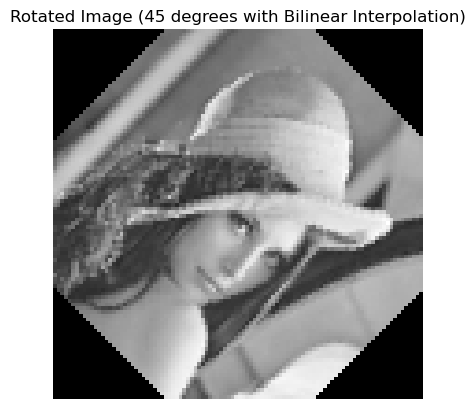

In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 加載圖片
image_path = 'lenna.jpg'
image = cv2.imread(image_path, 0)  # 讀取灰階圖像
image = cv2.resize(image, (100, 100))  # 縮小圖像
print(image.shape)

# 獲取圖像的尺寸
height, width = image.shape

# 創建一個與原圖大小相同的空陣列，用來存放旋轉後的圖像
Bilinear_rotated_image = np.zeros_like(image)
print(Bilinear_rotated_image.shape)  # 輸出旋轉後圖像的尺寸

# 計算旋轉矩陣的 cos 和 sin
cos_theta = np.cos(np.radians(45))  # 旋轉45度
sin_theta = np.sin(np.radians(45))  # 旋轉45度

# 計算旋轉中心
center_x = width // 2
center_y = height // 2

# 對圖像的每個像素應用反向映射
for new_y in range(height):  # 遍歷旋轉後圖像的每一行
    for new_x in range(width):  # 遍歷旋轉後圖像的每一列

        # 計算相對於旋轉中心的新坐標
        relative_x = new_x - center_x
        relative_y = new_y - center_y

        # 反向映射公式：計算該點在原圖中的浮點位置
        original_x = cos_theta * relative_x + sin_theta * relative_y + center_x
        original_y = -sin_theta * relative_x + cos_theta * relative_y + center_y

        # 確保原始坐標在圖像邊界內
        if 0 <= original_x < width - 1 and 0 <= original_y < height - 1:
            # 獲取整數部分和小數部分
            x0, y0 = int(original_x), int(original_y)
            x1, y1 = x0 + 1, y0 + 1

            # 計算小數部分
            dx = original_x - x0
            dy = original_y - y0

            # 雙線性插值
            f00 = image[y0, x0]
            f10 = image[y0, x1]
            f01 = image[y1, x0]
            f11 = image[y1, x1]

            interpolated_value = (f00 * (1 - dx) * (1 - dy) +
                                  f10 * dx * (1 - dy) +
                                  f01 * (1 - dx) * dy +
                                  f11 * dx * dy)

            Bilinear_rotated_image[new_y, new_x] = int(interpolated_value)

# 顯示旋轉後的圖像
plt.imshow(Bilinear_rotated_image, cmap='gray')
plt.title("Rotated Image (45 degrees with Bilinear Interpolation)")
plt.axis('off')
plt.show()


## 比較三種方法

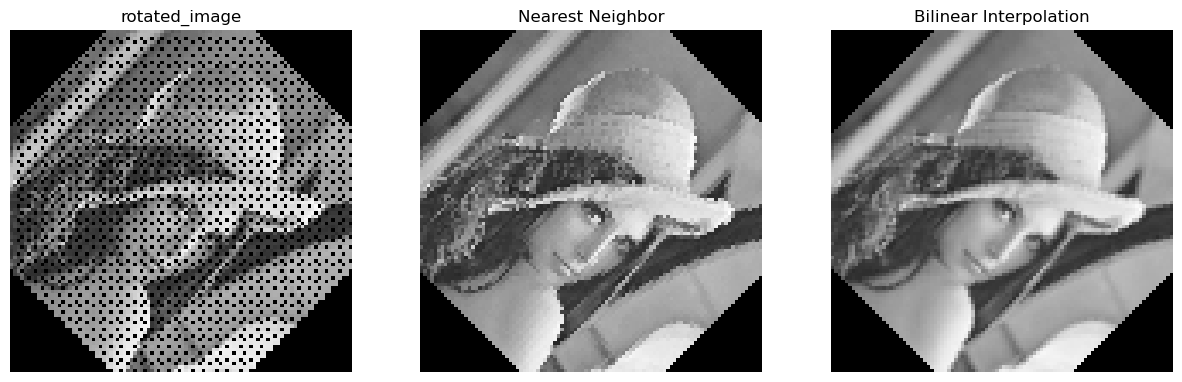

In [41]:
# 顯示原圖、最近鄰插值旋轉圖像和雙線性插值旋轉圖像
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(rotated_image, cmap='gray')
plt.title("rotated_image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(NN_rotated_image, cmap='gray')
plt.title("Nearest Neighbor")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Bilinear_rotated_image, cmap='gray')
plt.title("Bilinear Interpolation")
plt.axis('off')

plt.show()